In [2]:
# Imports Libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
from pathlib import Path

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from torchvision import models, transforms
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [3]:
dataset_path = "/kaggle/input/fashion-product-images-dataset/fashion-dataset"
styles_csv = os.path.join(dataset_path, "styles.csv")
images_csv = os.path.join(dataset_path, "images.csv")
images_folder = os.path.join(dataset_path, "images")

In [4]:
styles_df = pd.read_csv(styles_csv, on_bad_lines='skip')
styles_df.head()

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011.0,Casual,Turtle Check Men Navy Blue Shirt
1,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,2012.0,Casual,Peter England Men Party Blue Jeans
2,59263,Women,Accessories,Watches,Watches,Silver,Winter,2016.0,Casual,Titan Women Silver Watch
3,21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,2011.0,Casual,Manchester United Men Solid Black Track Pants
4,53759,Men,Apparel,Topwear,Tshirts,Grey,Summer,2012.0,Casual,Puma Men Grey T-shirt


In [5]:
images_df = pd.read_csv(images_csv)
images_df.head()

,filename,link
0,15970.jpg,http://assets.myntassets.com/v1/images/style/p...
1,39386.jpg,http://assets.myntassets.com/v1/images/style/p...
2,59263.jpg,http://assets.myntassets.com/v1/images/style/p...
3,21379.jpg,http://assets.myntassets.com/v1/images/style/p...
4,53759.jpg,http://assets.myntassets.com/v1/images/style/p...


In [6]:
# Data Preprocessing
styles_df = styles_df.dropna(subset=['gender', 'baseColour', 'masterCategory', 'season'])
styles_df.head()

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011.0,Casual,Turtle Check Men Navy Blue Shirt
1,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,2012.0,Casual,Peter England Men Party Blue Jeans
2,59263,Women,Accessories,Watches,Watches,Silver,Winter,2016.0,Casual,Titan Women Silver Watch
3,21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,2011.0,Casual,Manchester United Men Solid Black Track Pants
4,53759,Men,Apparel,Topwear,Tshirts,Grey,Summer,2012.0,Casual,Puma Men Grey T-shirt


In [7]:
styles_df['filename'] = styles_df['id'].astype(str).str.strip() + ".jpg"
styles_df.head()

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName,filename
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011.0,Casual,Turtle Check Men Navy Blue Shirt,15970.jpg
1,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,2012.0,Casual,Peter England Men Party Blue Jeans,39386.jpg
2,59263,Women,Accessories,Watches,Watches,Silver,Winter,2016.0,Casual,Titan Women Silver Watch,59263.jpg
3,21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,2011.0,Casual,Manchester United Men Solid Black Track Pants,21379.jpg
4,53759,Men,Apparel,Topwear,Tshirts,Grey,Summer,2012.0,Casual,Puma Men Grey T-shirt,53759.jpg


In [8]:
images_df['filename'] = images_df['filename'].apply(lambda x: os.path.basename(str(x).strip()))
images_df.head()

,filename,link
0,15970.jpg,http://assets.myntassets.com/v1/images/style/p...
1,39386.jpg,http://assets.myntassets.com/v1/images/style/p...
2,59263.jpg,http://assets.myntassets.com/v1/images/style/p...
3,21379.jpg,http://assets.myntassets.com/v1/images/style/p...
4,53759.jpg,http://assets.myntassets.com/v1/images/style/p...


In [9]:
df = pd.merge(styles_df, images_df, on='filename', how='inner')
df.head()

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName,filename,link
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011.0,Casual,Turtle Check Men Navy Blue Shirt,15970.jpg,http://assets.myntassets.com/v1/images/style/p...
1,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,2012.0,Casual,Peter England Men Party Blue Jeans,39386.jpg,http://assets.myntassets.com/v1/images/style/p...
2,59263,Women,Accessories,Watches,Watches,Silver,Winter,2016.0,Casual,Titan Women Silver Watch,59263.jpg,http://assets.myntassets.com/v1/images/style/p...
3,21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,2011.0,Casual,Manchester United Men Solid Black Track Pants,21379.jpg,http://assets.myntassets.com/v1/images/style/p...
4,53759,Men,Apparel,Topwear,Tshirts,Grey,Summer,2012.0,Casual,Puma Men Grey T-shirt,53759.jpg,http://assets.myntassets.com/v1/images/style/p...


In [10]:
df['filepath'] = df['filename'].apply(lambda x: os.path.join(images_folder, x))
df.head()

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName,filename,link,filepath
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011.0,Casual,Turtle Check Men Navy Blue Shirt,15970.jpg,http://assets.myntassets.com/v1/images/style/p...,/kaggle/input/fashion-product-images-dataset/f...
1,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,2012.0,Casual,Peter England Men Party Blue Jeans,39386.jpg,http://assets.myntassets.com/v1/images/style/p...,/kaggle/input/fashion-product-images-dataset/f...
2,59263,Women,Accessories,Watches,Watches,Silver,Winter,2016.0,Casual,Titan Women Silver Watch,59263.jpg,http://assets.myntassets.com/v1/images/style/p...,/kaggle/input/fashion-product-images-dataset/f...
3,21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,2011.0,Casual,Manchester United Men Solid Black Track Pants,21379.jpg,http://assets.myntassets.com/v1/images/style/p...,/kaggle/input/fashion-product-images-dataset/f...
4,53759,Men,Apparel,Topwear,Tshirts,Grey,Summer,2012.0,Casual,Puma Men Grey T-shirt,53759.jpg,http://assets.myntassets.com/v1/images/style/p...,/kaggle/input/fashion-product-images-dataset/f...


In [11]:
# Label Encoding
label_cols = ['gender', 'baseColour', 'masterCategory', 'season']
encoders = {}
for col in label_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    encoders[col] = le

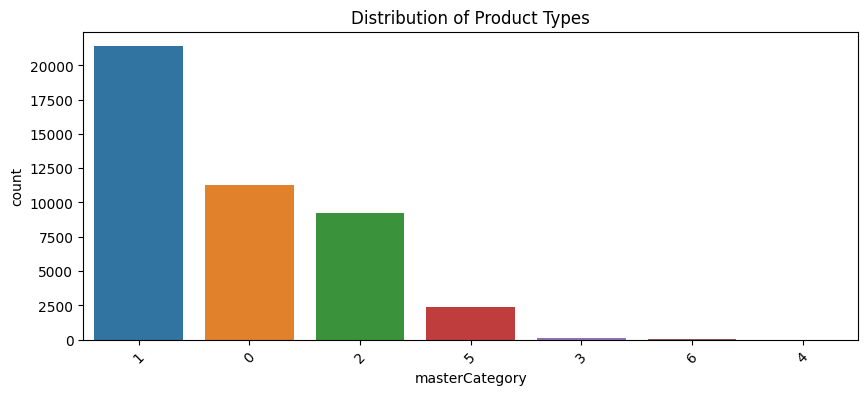

In [12]:
# EDA Visualizations
plt.figure(figsize=(10, 4))
sns.countplot(data=df, x='masterCategory', order=df['masterCategory'].value_counts().index)
plt.xticks(rotation=45)
plt.title("Distribution of Product Types")
plt.show()

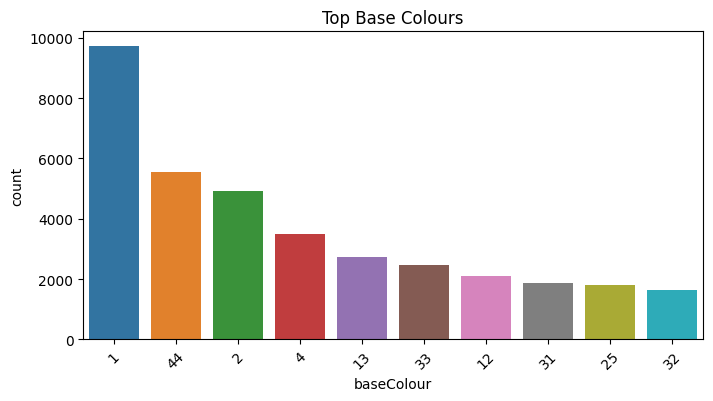

In [13]:
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='baseColour', order=df['baseColour'].value_counts().head(10).index)
plt.xticks(rotation=45)
plt.title("Top Base Colours")
plt.show()

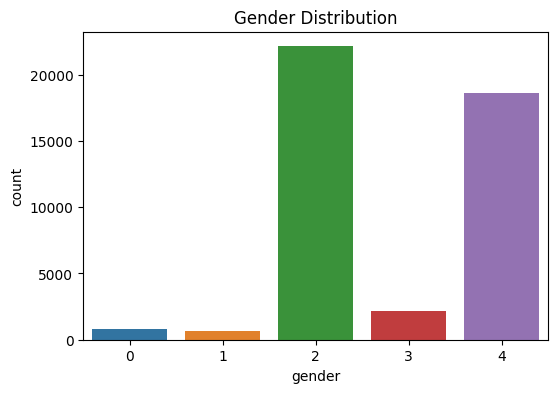

In [14]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='gender')
plt.title("Gender Distribution")
plt.show()

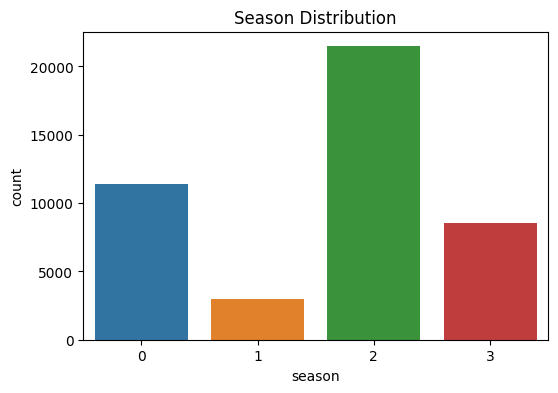

In [15]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='season')
plt.title("Season Distribution")
plt.show()

In [16]:
# Dataset Class
class FashionDataset(Dataset):
    def __init__(self, dataframe, transform=None):
        self.df = dataframe.reset_index(drop=True)
        self.transform = transform

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        row = self.df.iloc[idx]
        image = Image.open(row['filepath']).convert('RGB')
        if self.transform:
            image = self.transform(image)
        labels = torch.tensor([row['gender'], row['baseColour'], row['masterCategory'], row['season']], dtype=torch.long)
        return image, labels

In [17]:
# Transforms and Loaders
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],  # ImageNet stats
                         std=[0.229, 0.224, 0.225])
])

In [18]:
train_df, val_df = train_test_split(df, test_size=0.2, stratify=df['gender'], random_state=42)
train_dataset = FashionDataset(train_df, transform)
val_dataset = FashionDataset(val_df, transform)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

In [19]:
class MultiOutputModel(nn.Module):
    def __init__(self, n_genders, n_colours, n_categories, n_seasons):
        super().__init__()
        # ✅ Fix: Prevents internet download in Kaggle
        self.base_model = models.resnet18(weights=None)
        self.base_model.fc = nn.Identity()
        self.fc_gender = nn.Linear(512, n_genders)
        self.fc_colour = nn.Linear(512, n_colours)
        self.fc_category = nn.Linear(512, n_categories)
        self.fc_season = nn.Linear(512, n_seasons)

    def forward(self, x):
        x = self.base_model(x)
        return self.fc_gender(x), self.fc_colour(x), self.fc_category(x), self.fc_season(x)


In [23]:
# Multi-Output Model
class MultiOutputModel(nn.Module):
    def __init__(self, n_genders, n_colours, n_categories, n_seasons):
        super().__init__()
        self.base_model = models.resnet18(pretrained=False)
        self.base_model.fc = nn.Identity()
        self.fc_gender = nn.Linear(512, n_genders)
        self.fc_colour = nn.Linear(512, n_colours)
        self.fc_category = nn.Linear(512, n_categories)
        self.fc_season = nn.Linear(512, n_seasons)

    def forward(self, x):
        x = self.base_model(x)
        return self.fc_gender(x), self.fc_colour(x), self.fc_category(x), self.fc_season(x)


In [52]:
# Setup Training
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = MultiOutputModel(
    len(encoders['gender'].classes_),
    len(encoders['baseColour'].classes_),
    len(encoders['masterCategory'].classes_),
    len(encoders['season'].classes_)
).to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-4)

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


In [25]:
# Training Function
def train_epoch(model, loader):
    model.train()
    running_loss = 0
    for images, labels in loader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        out_gender, out_colour, out_category, out_season = model(images)
        loss = (
            criterion(out_gender, labels[:, 0]) +
            criterion(out_colour, labels[:, 1]) +
            criterion(out_category, labels[:, 2]) +
            criterion(out_season, labels[:, 3])
        )
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    return running_loss / len(loader)

In [30]:
# Save model and encoders
torch.save(model.state_dict(), "fashion_model.pth")
with open("encoders.pkl", "wb") as f:
    pickle.dump(encoders, f)

In [34]:
# Upload paths of Amazon product images
amazon_image_paths = [
    "/kaggle/input/amazon-products-1/Screenshot 2025-04-22 100937.png",
    "/kaggle/input/amazon-products-1/Screenshot 2025-04-22 101019.png",
    "/kaggle/input/amazon-products-1/Screenshot 2025-04-22 101122.png",
    "/kaggle/input/amazon-products-1/Screenshot 2025-04-22 101255.png",
    "/kaggle/input/amazon-products-1/Screenshot 2025-04-22 104839.png"
]

In [48]:
def predict_image(img_path):
    img = Image.open(img_path).convert('RGB')
    img = transform(img).unsqueeze(0).to(device)

    with torch.no_grad():
        outputs = model(img)

    color_output, type_output, season_output, gender_output = outputs

    # Get number of classes
    n_color_classes = len(encoders['baseColour'].classes_)
    n_type_classes = len(encoders['masterCategory'].classes_)
    n_season_classes = len(encoders['season'].classes_)
    n_gender_classes = len(encoders['gender'].classes_)

    # Safely predict by clipping
    color_pred = min(color_output.argmax(dim=1).item(), n_color_classes - 1)
    type_pred = min(type_output.argmax(dim=1).item(), n_type_classes - 1)
    season_pred = min(season_output.argmax(dim=1).item(), n_season_classes - 1)
    gender_pred = min(gender_output.argmax(dim=1).item(), n_gender_classes - 1)

    return {
        "Color": encoders['baseColour'].inverse_transform([color_pred])[0],
        "Type": encoders['masterCategory'].inverse_transform([type_pred])[0],
        "Season": encoders['season'].inverse_transform([season_pred])[0],
        "Gender": encoders['gender'].inverse_transform([gender_pred])[0]
    }


In [45]:
import pickle

# Load encoders
with open('/kaggle/working/encoders.pkl', 'rb') as f:  # or wherever your encoders.pkl is
    encoders = pickle.load(f)

# Create label mappings
gender_labels = encoders['gender'].inverse_transform(np.arange(len(encoders['gender'].classes_)))
color_labels = encoders['baseColour'].inverse_transform(np.arange(len(encoders['baseColour'].classes_)))
type_labels = encoders['masterCategory'].inverse_transform(np.arange(len(encoders['masterCategory'].classes_)))
season_labels = encoders['season'].inverse_transform(np.arange(len(encoders['season'].classes_)))


In [51]:
# Predict and plot results
for img_path in amazon_image_paths:
    preds = predict_image(img_path)

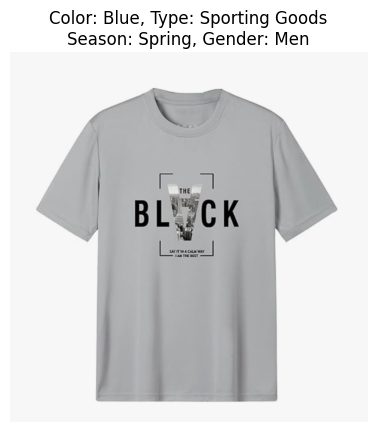

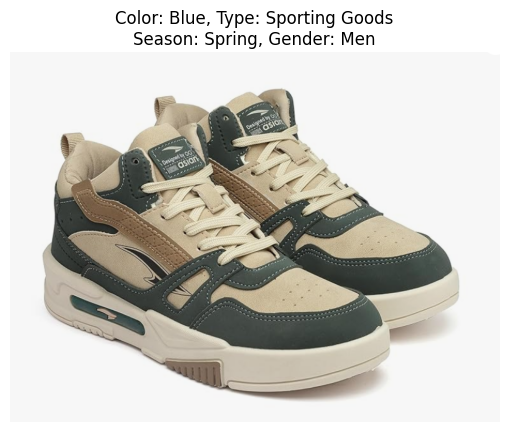

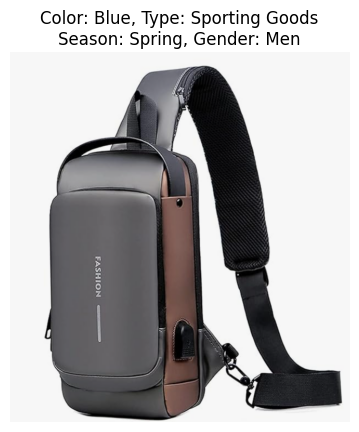

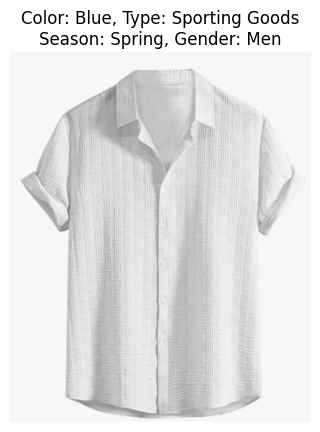

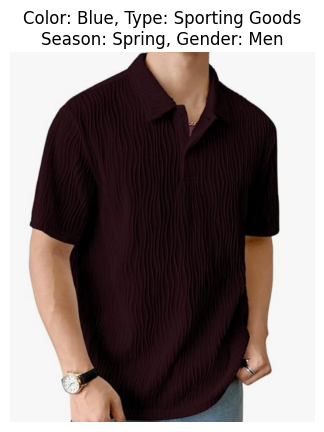

In [49]:
# Plot images with predictions
for img_path in amazon_image_paths:
    preds = predict_image(img_path)

    img = Image.open(img_path)
    plt.imshow(img)
    plt.axis('off')
    plt.title(f"Color: {preds['Color']}, Type: {preds['Type']}\nSeason: {preds['Season']}, Gender: {preds['Gender']}")
    plt.show()
